## Deep Neural Network

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [22]:
n_pts = 500
x, y = datasets.make_circles(n_samples=n_pts, noise=0.1, factor=0.2, random_state=123)

In [11]:
def scatter_plot():
    plt.scatter(x[y==0, 0], x[y==0, 1])
    plt.scatter(x[y==1, 0], x[y==1, 1])

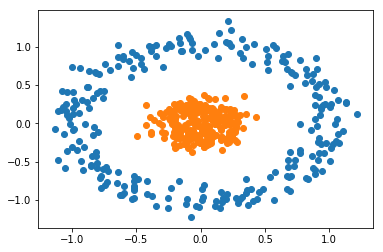

In [23]:
scatter_plot()

In [24]:
x_data = torch.Tensor(x)
y_data = torch.Tensor(y.reshape(-1, 1))

In [25]:
y_data[:2]

tensor([[0.],
        [1.]])

### Model

In [90]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1.
        else:
            return 0.

In [29]:
torch.manual_seed(2)
model = Model(2, 4, 1)

In [31]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1622, -0.1683],
         [ 0.1939, -0.0361],
         [ 0.3021,  0.1683],
         [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
 tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
 tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
 tensor([0.2116], requires_grad=True)]

In [32]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [33]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Text(0, 0.5, 'Loss')

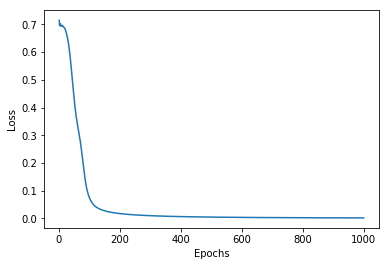

In [34]:
plt.plot(range(1, 1+epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [143]:
def plot_decision_boundary(x, y):
#for i in range(1):
    x_span = np.linspace(min(x[:, 0])-0.25, max(x[:, 0])+0.25)
    y_span = np.linspace(min(x[:, 1])-0.25, max(x[:, 1])+0.25)
    xx , yy = np.meshgrid(x_span, y_span)
    grids = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    z = np.array([model.predict(grid) for grid in grids]).reshape(xx.shape)
    #z = pred_func.view(xx.shape).detach().numpy()

    from matplotlib import cm, ticker
    import matplotlib as mpl
    
    cmap = mpl.colors.ListedColormap(['white', 'green'])
    bounds = [0, 0.5, 1]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    fig, ax = plt.subplots()
    #cs = ax.contourf(xx, yy, z, cmap=cm.PuBu) #locator=ticker.LogLocator(), cmap=cm.PuBu_r) #_r means reverse
    #cs = ax.pcolormesh(xx, yy, z, cmap = cmap, norm = norm)
    cs = ax.contourf(xx, yy, z, cmap = cmap, norm = norm)
    
    #set up the color map
    m = plt.cm.ScalarMappable(cmap = cmap)
    m.set_array(z)
    m.set_clim(0, 1)
    cbar = plt.colorbar(m, boundaries = bounds)
    
    cbar.ax.get_yaxis().set_ticks([])
    for j, lab in enumerate(['$0$','$1$']):
        cbar.ax.text(.5, (2 * j + 1) / 4.0, lab, ha='center', va='center', color = 'r')
    cbar.ax.get_yaxis().labelpad = 25
    cbar.ax.set_ylabel('Class', rotation=0)

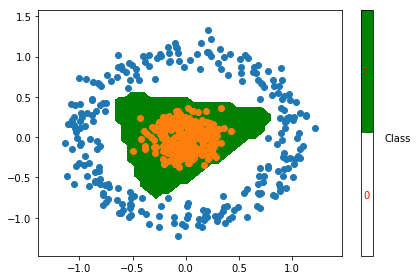

In [144]:
plot_decision_boundary(x, y)
scatter_plot()
plt.tight_layout()